In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Print the total time taken to execute the code
import time
start_time = time.time()

# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv',sep=';' )
dataset




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

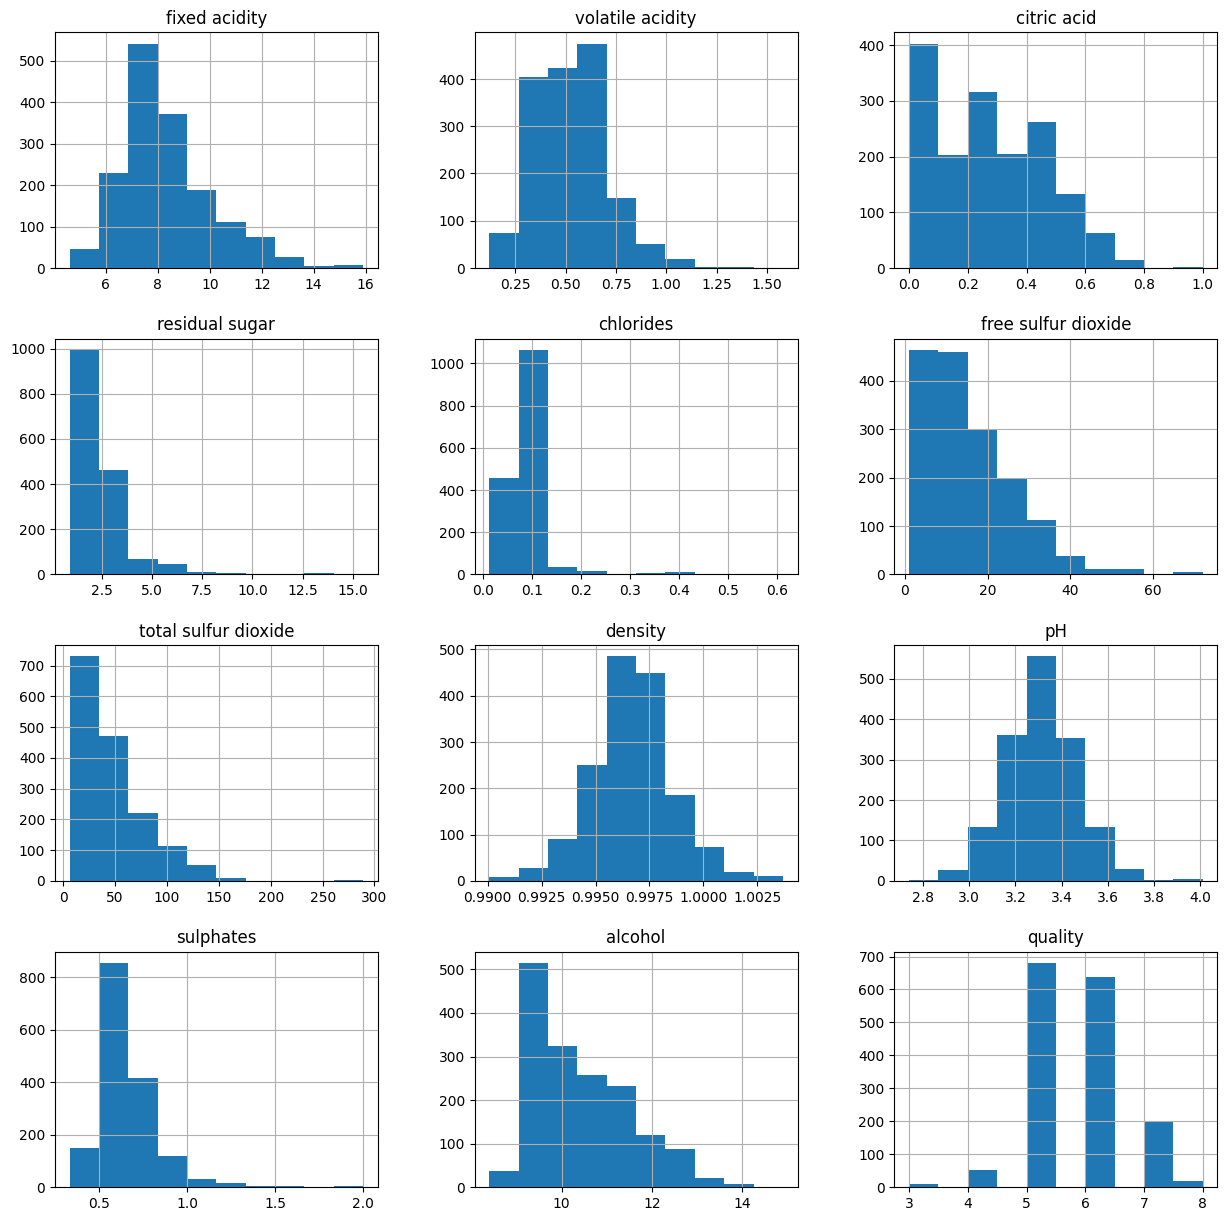

In [2]:
dataset.hist(figsize=(15,15))

In [3]:
def normalizar(x, xmax, xmin, ymax, ymin):
  m = (ymax - ymin) / (xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b

  return y

In [4]:

max = np.max(dataset).values
min = np.min(dataset).values
data = normalizar(dataset,max,min,1,0)
data.head(5)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [5]:
# Split the data into features and labels
X = data.drop('quality', axis=1)
y = data['quality']

In [6]:
X.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385


In [7]:
y.head(4)

0    0.4
1    0.4
2    0.4
3    0.6
Name: quality, dtype: float64

Seed

In [8]:
torch.manual_seed(42)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3)
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)


input_shape=(X_train.shape[1])
print(input_shape)

11


In [10]:
# Definir la arquitectura del modelo
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)
        self.layer2 = nn.Linear(16, 1)

    def forward(self, x):
        x = nn.functional.relu(self.layer1(x))
        x = self.layer2(x)
        return x

model = Model(X_train.shape[1])
print(model)

Model(
  (layer1): Linear(in_features=11, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=1, bias=True)
)


In [11]:
# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #The optimizer adam is not avalaible in pytorch in tensorflow yes.


In [12]:
# Entrenar el modelo
num_epochs = 50
batch_size = 100
train_losses = []
test_losses = []


In [13]:
for epoch in range(num_epochs):
    for i in range(0, X_train.shape[0], batch_size):
        # Obtener un batch de datos de entrenamiento y convertirlos a tensores de PyTorch
        inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
        targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32)

        # Reinicializar los gradientes del optimizador y calcular los logits
        optimizer.zero_grad()
        outputs = model(inputs)

        # Calcular la pérdida y los gradientes
        loss = criterion(outputs, targets)
        loss.backward()

        # Actualizar los parámetros del modelo
        optimizer.step()

    # Calcular las pérdidas de entrenamiento y prueba al final de cada época
    train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.float32))
    train_losses.append(train_loss)

    test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.float32))
    test_losses.append(test_loss)

    # Imprimir las pérdidas de entrenamiento y prueba al final de cada época
    print(f"Epoch {epoch+1}, train loss: {train_loss}, test loss: {test_loss}")


Epoch 1, train loss: 0.30203473567962646, test loss: 0.3155563771724701
Epoch 2, train loss: 0.2328035831451416, test loss: 0.24441395699977875
Epoch 3, train loss: 0.16772674024105072, test loss: 0.17685817182064056


<ipython-input-13-eb2369b91a5c>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-13-eb2369b91a5c>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/dist-packages/torch/nn/mod

Epoch 4, train loss: 0.11185387521982193, test loss: 0.11832604557275772
Epoch 5, train loss: 0.0703543946146965, test loss: 0.07410971075296402
Epoch 6, train loss: 0.0450560562312603, test loss: 0.046289071440696716
Epoch 7, train loss: 0.03387318551540375, test loss: 0.032973721623420715
Epoch 8, train loss: 0.031584370881319046, test loss: 0.029224516823887825
Epoch 9, train loss: 0.03144364804029465, test loss: 0.02874569222331047
Epoch 10, train loss: 0.031083019450306892, test loss: 0.02860485576093197
Epoch 11, train loss: 0.030887404456734657, test loss: 0.028562594205141068
Epoch 12, train loss: 0.03070845454931259, test loss: 0.028372054919600487
Epoch 13, train loss: 0.03054191544651985, test loss: 0.028144748881459236
Epoch 14, train loss: 0.030403167009353638, test loss: 0.027976857498288155
Epoch 15, train loss: 0.030283402651548386, test loss: 0.027851756662130356
Epoch 16, train loss: 0.030175594612956047, test loss: 0.02774120308458805
Epoch 17, train loss: 0.03007476

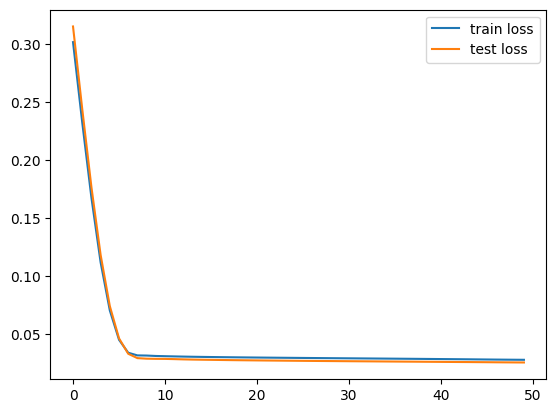

In [14]:
# Convert train_losses and test_losses to PyTorch tensors
train_losses_tensor = torch.tensor(train_losses)
test_losses_tensor = torch.tensor(test_losses)
import matplotlib.pyplot as plt
# Plot the loss curves
plt.plot(train_losses_tensor.detach().numpy(), label='train loss')
plt.plot(test_losses_tensor.detach().numpy(), label='test loss')
plt.legend()
plt.show()


In [15]:
tensor_X_test = torch.tensor(X_test, dtype=torch.float32)
print(tensor_X_test[:4])


tensor([[0.0885, 0.5445, 0.0000, 0.0822, 0.0484, 0.2254, 0.2544, 0.2489, 0.7402,
         0.2395, 0.4615],
        [0.3717, 0.2466, 0.4100, 0.1644, 0.1336, 0.3521, 0.1625, 0.5969, 0.4488,
         0.1198, 0.3231],
        [0.3186, 0.4178, 0.2100, 0.0548, 0.1035, 0.0563, 0.0247, 0.4941, 0.3622,
         0.1138, 0.1692],
        [0.3009, 0.0411, 0.3700, 0.0000, 0.0618, 0.4930, 0.3640, 0.0000, 0.1181,
         0.0659, 0.6615]])


In [16]:
tensor_y_test = torch.tensor(y_test, dtype=torch.float32)
print(tensor_y_test[:4])

tensor([0.4000, 0.6000, 0.4000, 0.6000])


In [17]:
# Evaluar el modelo en el conjunto de prueba
y_pred = model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
print(y_pred[:4])


[[0.5709466]
 [0.5274872]
 [0.5102666]
 [0.4505849]]


In [18]:
# Convertir los valores de y_test y y_pred a tensores de PyTorch
y_test_tensor = torch.tensor(y_test)
y_pred_tensor = torch.tensor(y_pred)

# Calcular el MSE
mse = torch.nn.functional.mse_loss(y_pred_tensor, y_test_tensor)
mae = torch.nn.functional.l1_loss(y_pred_tensor, y_test_tensor)

# Calcular el RMSE
rmse = torch.sqrt(mse)

print('RMSE:', rmse)
print('MAE:', mae.item())

RMSE: tensor(0.1596, dtype=torch.float64)
MAE: 0.13450042063204784


<ipython-input-18-e4f6b867f5b6>:6: UserWarning: Using a target size (torch.Size([480])) that is different to the input size (torch.Size([480, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = torch.nn.functional.mse_loss(y_pred_tensor, y_test_tensor)
<ipython-input-18-e4f6b867f5b6>:7: UserWarning: Using a target size (torch.Size([480])) that is different to the input size (torch.Size([480, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mae = torch.nn.functional.l1_loss(y_pred_tensor, y_test_tensor)


In [19]:

# do all the code here

print("Total time taken:", time.time() - start_time, "seconds.")

Total time taken: 6.5122833251953125 seconds.


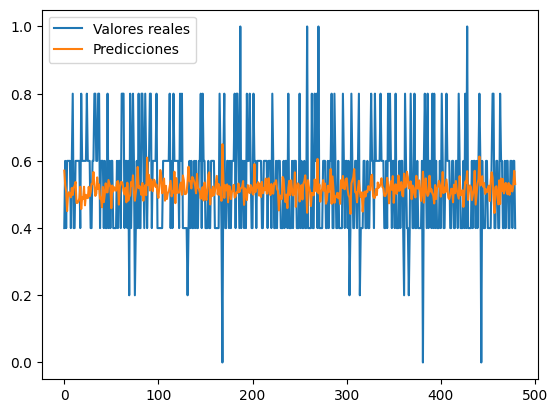

In [20]:


# Obtener las predicciones
y_pred = model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()

# Graficar las predicciones en comparación con los valores reales
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.show()


In [21]:

# do all the code here

print("Total time taken:", time.time() - start_time, "seconds.")

Total time taken: 7.0146472454071045 seconds.
